HISTOGRAMMING

In [1]:
# import boost_histogram as bh

# # Compose axis however you like; this is a 2D histogram
# hist = bh.Histogram(bh.axis.Regular(2, 0, 1),
#                     bh.axis.Regular(4, 0.0, 1.0))

# # Filling can be done with arrays, one per dimension
# hist.fill([.3, .5, .2],
#           [.1, .4, .9])

# # Numpy array view into histogram counts, no overflow bins
# counts = hist.view()

USING PURE PYTHON

In [20]:
# Need not be sorted, necessarily
a = (0, 1, 1, 1, 2, 3, 7, 7, 23000)

def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(a)
counted

{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23000: 1}

In [21]:
def ascii_histogram(seq) -> None:
    """A horizontal frequency-table/histogram plot."""
    counted = count_elements(seq)
    for k in sorted(counted):
        print('{0:5d} {1}'.format(k, '+' * counted[k]))

In [22]:
ascii_histogram(a)

    0 +
    1 +++
    2 +
    3 +
    7 ++
23000 +


In [ ]:
import random
random.seed(0)

vals = [1, 3, 4, 6, 8, 9, 10]
# Each number in `vals` will occur between 5 and 15 times.
freq = (random.randint(5, 15) for _ in vals)

data = []
for f, v in zip(freq, vals):
    data.extend([v] * f)

ascii_histogram(data)

USING NUMPY

In [74]:
import numpy as np
# `numpy.random` uses its own PRNG.
np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15, scale=3, size=500)
d[:5]

array([18.406, 18.087, 16.004, 16.221,  7.358])

In [75]:
hist, bin_edges = np.histogram(d)

bin_edges

array([ 2.11 ,  5.874,  9.638, 13.402, 17.166, 20.93 , 24.694, 28.458,
       32.222, 35.986, 39.749])

In [76]:
hist

array([ 13,  23,  91, 261,  80,  21,   7,   2,   1,   1])

In [77]:
hist.size, bin_edges.size

(10, 11)

IMPLEMENTATION OF BINNING

In [78]:
# The leftmost and rightmost bin edges
first_edge, last_edge = d.min(), d.max()

n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge,
                        num=n_equal_bins + 1, endpoint=True)

bin_edges

array([ 2.11 ,  5.874,  9.638, 13.402, 17.166, 20.93 , 24.694, 28.458,
       32.222, 35.986, 39.749])

In [79]:
dalt = list(map(int, d))
dalt = np.array(dalt)
d
bcounts = np.bincount(dalt)
hist, _ = np.histogram(d, range=(0, dalt.max()), bins=dalt.max() + 1)

np.array_equal(hist, bcounts)

# Reproducing `collections.Counter`
dict(zip(np.unique(dalt), bcounts[bcounts.nonzero()]))

{2: 2,
 3: 3,
 4: 4,
 5: 4,
 6: 3,
 7: 1,
 8: 10,
 9: 11,
 10: 20,
 11: 24,
 12: 30,
 13: 53,
 14: 82,
 15: 71,
 16: 63,
 17: 32,
 18: 31,
 19: 9,
 20: 17,
 21: 11,
 22: 5,
 23: 3,
 24: 1,
 25: 3,
 26: 2,
 27: 1,
 28: 2,
 34: 1,
 39: 1}

MATPLOTLIB + PANDAS

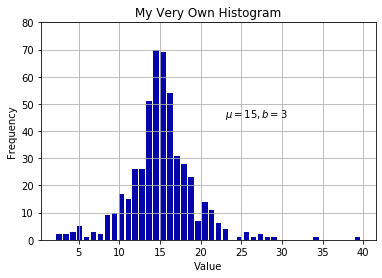

In [90]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=1, rwidth=0.8)
plt.grid(axis='y', alpha=1)
plt.grid(axis='x', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

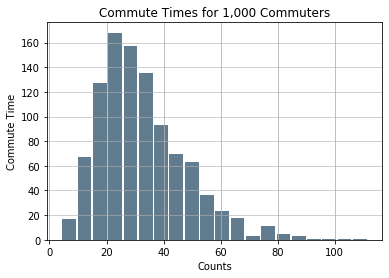

In [118]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
np.random.seed(5)
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)
# commutes

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [119]:
commutes

0      37.003566
1      25.546409
2      85.216230
3      26.568586
4      18.943970
         ...    
995    36.043006
996    54.286943
997    32.074948
998    50.125319
999    60.363083
Length: 1000, dtype: float64

In [137]:
# Sample from two different normal distributions
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,a,b
min,-4.67,13.87
max,23.66,26.81
mean,10.08,19.94
std,3.86,2.02


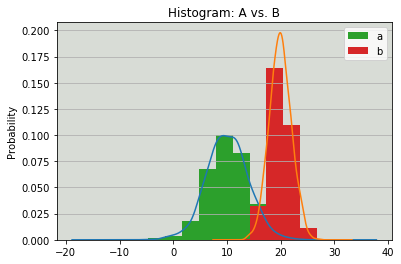

In [138]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

MISC. PANDAS

In [141]:
import pandas as pd

data = np.random.choice(np.arange(10), size=10000,
                        p=np.linspace(1, 11, 10) / 60)
s = pd.Series(data)

s.value_counts()

9    1903
8    1665
7    1463
6    1293
5    1095
4     846
3     713
2     511
1     350
0     161
dtype: int64

In [142]:
s.value_counts(normalize=True).head()

9    0.1903
8    0.1665
7    0.1463
6    0.1293
5    0.1095
dtype: float64

In [143]:
ages = pd.Series(
    [1, 1, 3, 5, 8, 10, 12, 15, 18, 18, 19, 20, 25, 30, 40, 51, 52])
bins = (0, 10, 13, 18, 21, np.inf)  # The edges
labels = ('child', 'preteen', 'teen', 'military_age', 'adult')
groups = pd.cut(ages, bins=bins, labels=labels)

groups.value_counts()

child           6
adult           5
teen            3
military_age    2
preteen         1
dtype: int64

In [144]:
pd.concat((ages, groups), axis=1).rename(columns={0: 'age', 1: 'group'})

,age,group
0,1,child
1,1,child
2,3,child
3,5,child
4,8,child
5,10,child
6,12,preteen
7,15,teen
8,18,teen
9,18,teen


TESTING CORRECTNESS OF KDE

Text(-2.0, 0.35, '$f(x) = \\frac{\\exp(-x^2/2)}{\\sqrt{2*\\pi}}$')

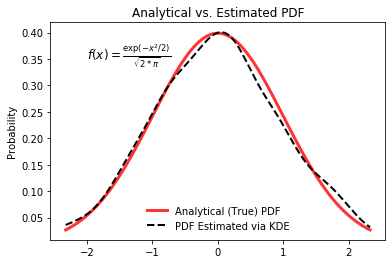

In [134]:
from scipy import stats

# An object representing the "frozen" analytical distribution
# Defaults to the standard normal distribution, N~(0, 1)
dist = stats.norm()

# Draw random samples from the population you built above.
# This is just a sample, so the mean and std. deviation should
# be close to (1, 0).
samp = dist.rvs(size=1000)

# `ppf()`: percent point function (inverse of cdf — percentiles).
x = np.linspace(start=stats.norm.ppf(0.01),
                stop=stats.norm.ppf(0.99), num=250)
gkde = stats.gaussian_kde(dataset=samp)

# `gkde.evaluate()` estimates the PDF itself.
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF')
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE')
ax.legend(loc='best', frameon=False)
ax.set_title('Analytical vs. Estimated PDF')
ax.set_ylabel('Probability')
ax.text(-2., 0.35, r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$',
        fontsize=12)

SEABORN

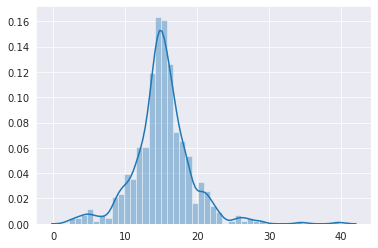

In [139]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(d)

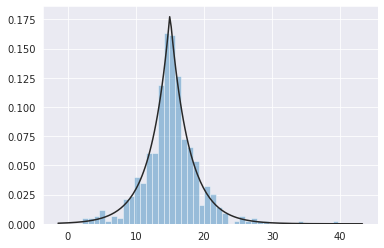

In [140]:
sns.distplot(d, fit=stats.laplace, kde=False)